<a href="https://colab.research.google.com/github/newbiepawel/deep_learning_and_other/blob/master/sellectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
df.head()

,product_name,purchase_date,sales
0,product_1,2020-04-25,3278.07
1,product_1,2020-04-24,2918.35
2,product_1,2020-04-23,3838.96
3,product_1,2020-04-27,3768.21
4,product_1,2020-05-16,4370.40


In [ ]:
df.tail()

,product_name,purchase_date,sales
8501,product_1,2018-01-12,19.32
8502,product_1,2018-01-15,425.05
8503,product_1,2018-01-10,57.96
8504,product_1,2018-01-09,57.96
8505,product_1,2018-01-11,19.32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   8506 non-null   object 
 1   purchase_date  8506 non-null   object 
 2   sales          8506 non-null   float64
dtypes: float64(1), object(2)
memory usage: 199.5+ KB


In [ ]:
# Stworzenie nowej zmiennej - miesiąc
df['month'] = df['purchase_date'].apply(lambda x:x[0:7])

In [ ]:
df['purchase_date'] = pd.to_datetime(df.purchase_date)

In [ ]:
df[df['sales'] == df['sales'].max()]

,product_name,purchase_date,sales,month
7459,product_1,2019-07-16,18516.43,2019-07


Wykres przedstawiający wartość sprzedaży każdego produktu w czasie.
Żaden produkt nie wydaje sięmieć trendu natomiast kilka produktów posiadają sezonowość(głównie product_3)

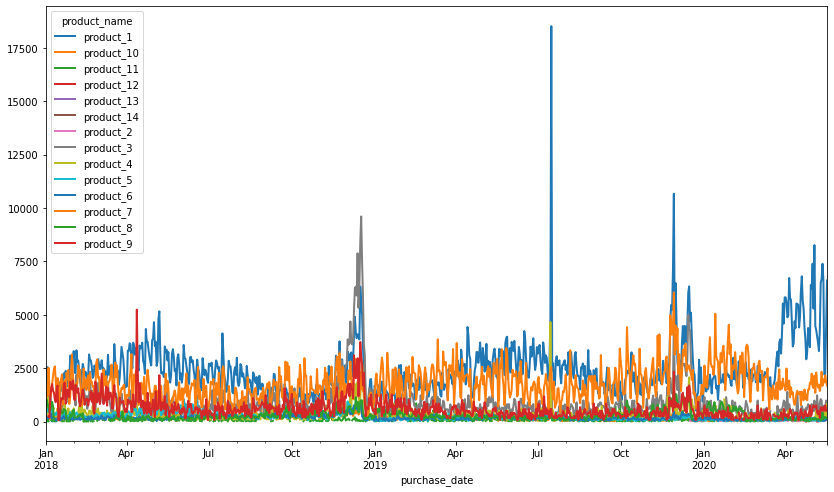

In [ ]:
fig = df.groupby(['purchase_date', 'product_name'])['sales'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)


Wykres sprzedaży produktów w czasie, bez najlepiej się sprzedającego(product_1) produktu dla lepszej wizualizacji,
product_3 wydaje się najbardziej odbiegać od średniej, w okolicach świąt Bożego Narodzenia

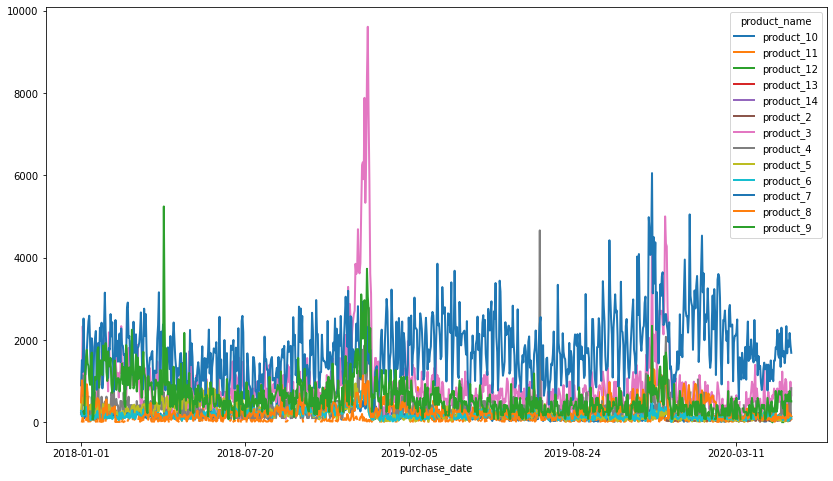

In [ ]:
fig = df[df['product_name'] != 'product_1'].groupby(['purchase_date', 'product_name'])['sales'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Udział sprzedaży każdego produkty w poszczególnych miesiącah
Wykres wydaje się nie mieć trendu jednak mozna zauważyc sezonowość,
zwiększona sprzedaż w okresach świąt(Bożego Narodzenia i Wielkanocy) oraz okresach przedświątecznych, szególnie widać to dla product_3 w 2018 r.

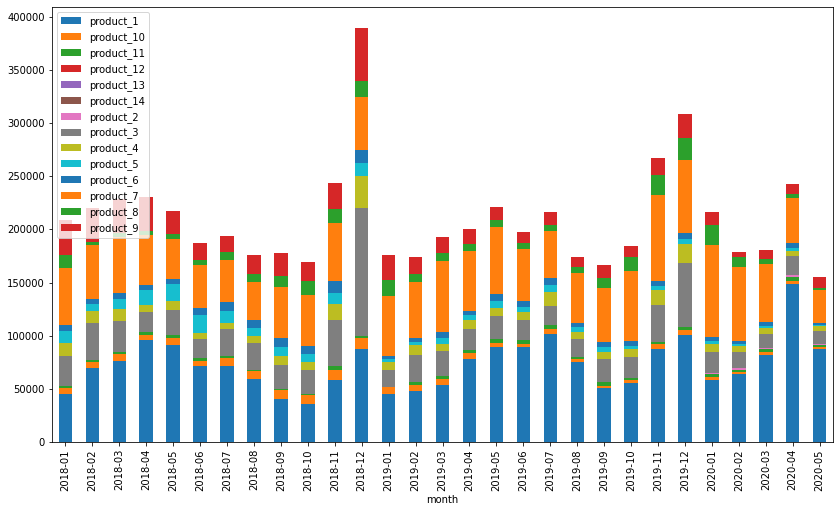

In [ ]:
fig = df.groupby(['month', 'product_name'])['sales'].sum().unstack().plot(kind = 'bar', stacked = True,
    figsize=(14, 8), linewidth=2)
plt.legend(loc = 'upper left')

Udział procentowy każdego produktu w częstości sprzedaży(jak często dany produkt jest sprzedawany), oprócz product_12 każdy produkt sprzedaje się mniej więcej tak samo. Biorąc pod uwagę wcześniejsze wizualizację można dojść do wniosku, że produkt_1 jest najdroższy gdyż ma zdecydowanie największy udział w sprzedaży, natomiast nie widać jego przewagi(przynajmniej znaczącej) w ilości jakiej się sprzedaje.

<Figure size 432x288 with 0 Axes>

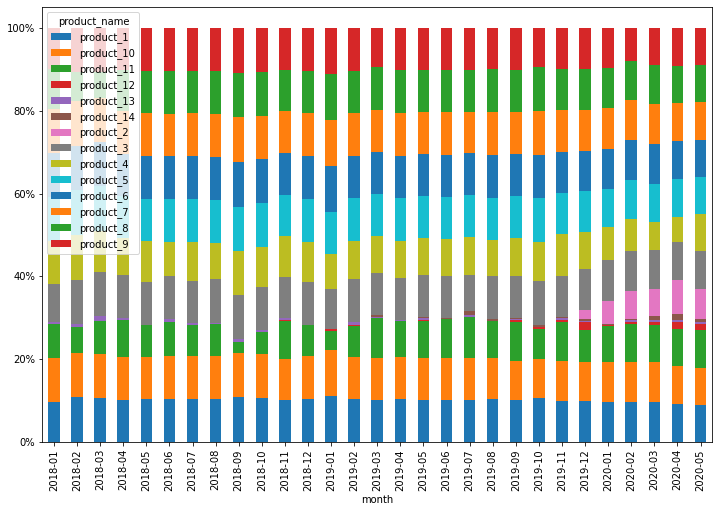

In [ ]:
plt.figure()
df.groupby(['month', 'product_name']).size().groupby(level = 0).apply(
lambda x:100*x/x.sum()).unstack().plot(kind = 'bar', stacked = True, figsize=(12,8))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter());

Poniżej tabela zawierająca podstawowe statystyki dotyczące sprzedaży danego produktu

In [5]:
sorted_df = df.groupby('product_name').mean().sort_values(by='sales', ascending = False)
sorted_df.columns = ['średnia']
sorted_df['odch.stand'] = df.groupby('product_name').std().sort_values(by='sales', ascending = False).values
sorted_df['max'] = df.groupby('product_name').max().sort_values(by='sales', ascending = False).values[:,1]
sorted_df['min'] = df.groupby('product_name').min().sort_values(by='sales', ascending = False).values[:,1]                       
sorted_df

,średnia,odch.stand,max,min
product_name,,,,
product_1,2451.201538,1306.887759,18516.4,251.36
product_7,1778.646555,918.958995,9608.12,103.82
product_3,915.862971,771.269489,6054.34,75.32
product_9,627.090914,479.630835,5244.43,65.63
product_4,349.474739,330.705733,4662.54,37.56
product_8,306.852613,228.054539,1573.84,19.4
product_5,233.486156,172.922254,1069.9,19.32
product_6,187.505714,115.605626,1053.27,18.16
product_10,172.485977,110.934917,908.1,16.9


Poniżej macierz korelacji produktów
Najbardziej skorelowana sprzedaż jest product_3 i product_9

In [ ]:
df.pivot(index = 'purchase_date', columns = 'product_name').corr()

sales             ...                    
product_name       product_1 product_10  ... product_8 product_9
      product_name                       ...                    
sales product_1     1.000000   0.089483  ...  0.089152  0.168760
      product_10    0.089483   1.000000  ...  0.279375  0.445513
      product_11    0.077821  -0.002051  ... -0.002291 -0.011560
      product_12    0.225813   0.295671  ...  0.163999  0.378169
      product_13    0.137268  -0.211008  ... -0.061842 -0.140953
      product_14   -0.278407   0.000354  ... -0.177404 -0.314842
      product_2     0.222398   0.035364  ... -0.146892  0.082299
      product_3     0.308050   0.452225  ...  0.470273  0.600804
      product_4     0.275893   0.421576  ...  0.386377  0.418372
      product_5     0.136267   0.429702  ...  0.005733  0.407050
      product_6     0.137698   0.532156  ...  0.304351  0.386061
      product_7     0.195037   0.115930  ...  0.511330  0.064300
      product_8     0.089152   0.279375  ...  1.000000  0.266681
      product_9     0.168760   0.445513  ...  0.266681  1.000000

[14 rows x 14 columns]

Poniżej graficzne przedstawienie macierzy korelacji

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


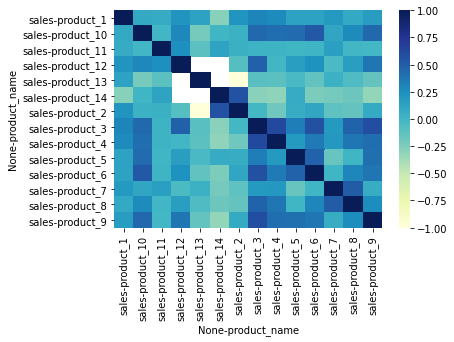

In [ ]:
sns.heatmap(df.pivot(index = 'purchase_date', columns = 'product_name').corr(),cmap="YlGnBu")

Poniżej wykres prezentujący rozkład każdego produktu
Rozkład większości produktów posiada asymetrię prawostronną.
Co oznacza, że występują extremalne odchylenia od średniej w sprzedaży.
Najbardziej extremalne są jak już wcześniej zostało przedstawione dla pruduct_1 gdzie średnia sprzedaż to ok 2000, a występują obserwacje gdzie sprzedaż przekroczyła niemalże 20000, product_3 oraz produkt 9.

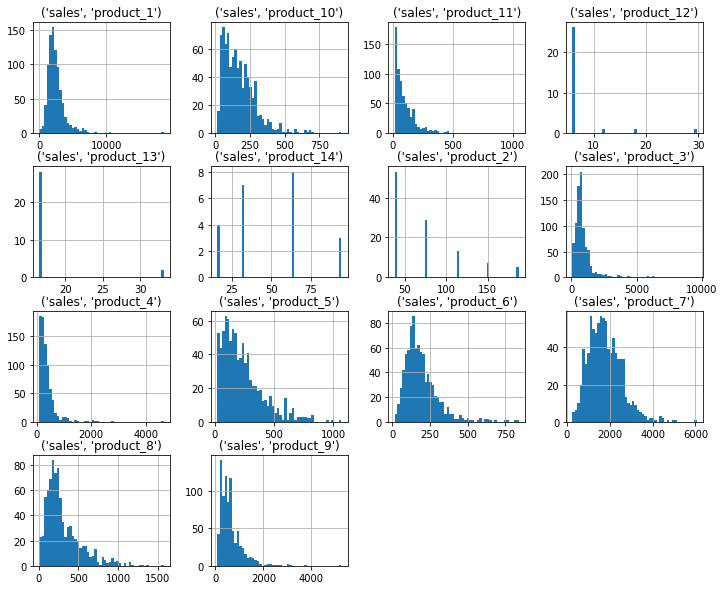

In [ ]:
df.pivot(index = 'purchase_date', columns = 'product_name').hist(figsize = (12, 10), bins = 50);

Jako coś dodatkowego postanowiłem, że zajmę się też szacowaniem przyszłych wartości sprzedaży.
Do modelowania wybrałem według mnie najciekawszy produkt: product_1 

In [11]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [8]:
# Nowy dataframe gdzie każdy produkt to osobna kolumna, ułatwienie jeśli chodzi o modelowanie
df2 = df.pivot(index = 'purchase_date', columns = 'product_name', values = 'sales')

In [18]:
df2.head()

product_name,product_1,product_10,product_11,product_12,product_13,product_14,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9
purchase_date,,,,,,,,,,,,,,
2018-01-01,1799.01,232.42,NaN,NaN,NaN,NaN,NaN,527.23,207.65,286.82,277.34,898.85,484.38,NaN
2018-01-02,2528.88,149.84,20.46,NaN,NaN,NaN,NaN,979.78,311.47,600.83,171.68,1509.30,1022.82,130.21
2018-01-03,2551.44,166.30,122.75,NaN,NaN,NaN,NaN,2335.53,1142.06,600.83,145.27,1221.79,820.33,NaN
2018-01-04,2262.26,282.36,20.46,NaN,NaN,NaN,NaN,1809.56,415.29,465.17,198.10,2522.75,684.72,260.95
2018-01-05,1179.26,99.75,NaN,NaN,NaN,NaN,NaN,980.41,416.18,461.28,171.68,1569.62,452.62,195.32


Jednym z najpopularniejszych modeli do modelowania szeregów czasowych jest ARIMA.
W celu dobrania odpowiednich parametrów do modelu wyświetlę wykres ACF i PACF do zwerywikowania autokorelacji i autokorelacji cząstkowej.
Jako badany szereg posłuży szereg logarytmicznych stóp zwrotu(jak w finansach) gdyż cechuje się addytywnością oraz niemalże zawsze szereg takich zwrotów jest stacjonarny.

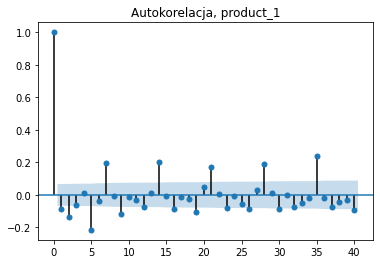

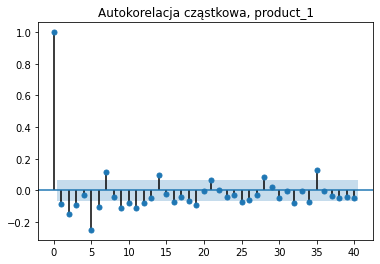

In [22]:
plot_acf(np.log(df2['product_1'].dropna()/df2['product_1'].dropna().shift(1)).dropna().values,lags=40, title='Autokorelacja, product_1');
plot_pacf(np.log(df2['product_1'].dropna()/df2['product_1'].dropna().shift(1)).dropna().values,lags=40, title='Autokorelacja cząstkowa, product_1');

Poniżej wbudowana funkcja arma_order_select_ic z biblioteki Statsmodels do automatycznego wyszukania najlepszego "ARIMA order" na podstawie funkcji największej wiarygodności. W tym wypadku najlepszy order to (1,1)

In [16]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [20]:
arma_order_select_ic(np.log(df2['product_1'].dropna()/df2['product_1'].dropna().shift(1)).dropna().values)

{'bic':             0           1           2
 0  549.999304  547.628548  526.848224
 1  550.423921  479.027917  483.024596
 2  538.135107  483.160278  489.697292
 3  537.549286  489.640067  496.367686
 4  543.735682  495.935705  501.881082, 'bic_min_order': (1, 1)}

Ważne jest by modelując szeregi czasowe modelowany szereg był stacjonarny.
Dobrym sposobem na zweryfikowanie tego jest test Augmented Dickey-Fuller test.
H0: szereg niestacjonarny
W tym przypadku logarytmiczne zwroty z product_1 są stacjonarne

In [23]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(np.log(df2['product_1'].dropna()/df2['product_1'].dropna().shift(1)).dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.328535
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


Biorąc pod uwagę, że występuje kilka extremalnie wartości odstających rozważyłbym użycie danych bez outliersów w tym celu użyje funkcji quantile i użyję obserwacji poniżej 0.99 kwantyla.

In [61]:
vector = (df2['product_1'].dropna()[df2['product_1'].dropna() <= df2['product_1'].dropna().quantile(q=0.99)])

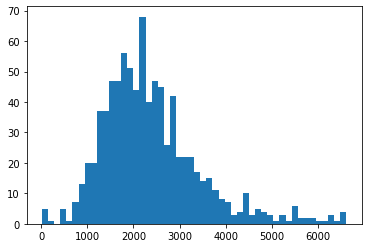

In [67]:
plt.hist(vector, bins = 50);

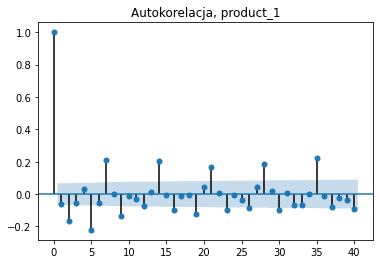

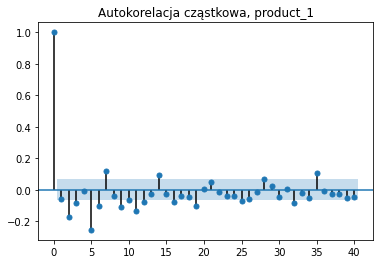

In [65]:
plot_acf(np.log(vector/vector.shift(1)).dropna().values,lags=40, title='Autokorelacja, product_1');
plot_pacf(np.log(vector/vector.shift(1)).dropna().values,lags=40, title='Autokorelacja cząstkowa, product_1');

In [64]:
arma_order_select_ic(np.log(vector/vector.shift(1)).dropna().values)

{'bic':             0           1           2
 0  483.424692  485.390002  458.529376
 1  487.093599  417.595247  418.399718
 2  467.585179  419.155267  424.718821
 3  468.375533  423.850215  430.536656
 4  475.086430  430.208309  436.041902, 'bic_min_order': (1, 1)}